In [117]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt


# Question 0

Using the penguins dataset below, if you put all Adelie penguins from the dataset living on Torgersen island on a scale together at the same time, how much would they weigh?

In [118]:
import seaborn as sns
penguins = sns.load_dataset('penguins')

solution:

In [119]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [120]:
atpenguins= penguins.groupby(['species','island'])[['body_mass_g']].sum()
print(atpenguins)

##The total weight of the Adelie penguins on Torgersen island within this dataset would be 189,025 grams

                     body_mass_g
species   island                
Adelie    Biscoe        163225.0
          Dream         206550.0
          Torgersen     189025.0
Chinstrap Dream         253850.0
Gentoo    Biscoe        624350.0


# Let's play with this dataset! A different kind of wine data.

The features are 13 chemical (numerical) attributes of 178 different wines. These wines are made by 3 different producers in Italy, which is the dependent variable: producer 0, 1, 2.

In [121]:
data = load_wine()

In [122]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [123]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [124]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [125]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Question 1

Are there any missing values in X? If so, in which columns and how many?

In [126]:
X.isnull().sum() | X.eq('').sum()

#There are no missing values in X

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

### Question 2

Add a feature called 'above_avg_alcohol' that is 1 if the alcohol content is above the average for the dataset, and 0 otherwise.

Add any other features you think might be good!

In [127]:
X['above_avg_alcohol']=np.where(X['alcohol'] > X['alcohol'].mean(), 1,0)
#X['above_malic_acid']=np.where(X['malic_acid'] > X['malic_acid'].mean(), 1,0)
#X['above_avg_magnesium']=np.where(X['magnesium'] > X['magnesium'].mean(), 1,0)
#X['above_avg_proline']=np.where(X['proline'] > X['proline'].mean(), 1,0)
X['above_ash']=np.where(X['ash'] > X['ash'].mean(), 1,0)
X['above_avg_alc_of_ash']=np.where(X['alcalinity_of_ash'] > X['alcalinity_of_ash'].mean(), 1,0)
X.tail(30)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,above_avg_alcohol,above_ash,above_avg_alc_of_ash
148,13.32,3.24,2.38,21.5,92.0,1.93,0.76,0.45,1.25,8.420000,0.55,1.62,650.0,1,1,1
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.400000,0.57,1.33,550.0,1,0,1
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.600000,0.59,1.30,500.0,1,1,1
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.800000,0.48,1.47,480.0,0,1,1
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.100000,0.61,1.33,425.0,1,1,1
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.520000,0.56,1.51,675.0,1,0,0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.600000,0.58,1.55,640.0,0,0,1
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.900000,0.60,1.48,725.0,1,0,1
156,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.010000,0.57,1.64,480.0,1,1,1
157,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.500000,0.67,1.73,880.0,0,1,1


### Question 3 (WITH BONUS POINT OPPORTUNITY!)

Create a KNN model to predict y based on whichever features from X, including any new ones you created. Print the confusion matrix and accuracy on X and y (so on its own training data). 

Full credit for the question if it works and you use KNN to predict y given X. However, extra credit to the person with the highest accuracy score! It may even help to drop some confounding features. Or to tweak K. Or to engineer some other features.

In [128]:
model= KNeighborsClassifier(n_neighbors=3)

In [129]:
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [130]:
print(model)

KNeighborsClassifier(n_neighbors=3)


In [131]:
y_pred=model.predict(X)

In [132]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [133]:
from sklearn.metrics import cohen_kappa_score
#accuracy
print(sum(y==y_pred)/len(y))
#cohen_kappa_score
print(cohen_kappa_score(y,y_pred))

0.8707865168539326
0.8049082678103407


In [134]:
confusion_matrix(y,y_pred)

array([[55,  0,  4],
       [ 4, 59,  8],
       [ 1,  6, 41]], dtype=int64)

In [135]:
for k_param in range(3, 10):
    model = KNeighborsClassifier(n_neighbors=k_param)
    model.fit(X, y)
    y_pred = model.predict(X)
    print(k_param, 'Accuracy: ', sum(y == y_pred) / len(y))

3 Accuracy:  0.8707865168539326
4 Accuracy:  0.8314606741573034
5 Accuracy:  0.7865168539325843
6 Accuracy:  0.7752808988764045
7 Accuracy:  0.7528089887640449
8 Accuracy:  0.7752808988764045
9 Accuracy:  0.7752808988764045


In [136]:
##accuracy of 0.87 with 3 neighbors was the best outcome I was able to get after testing a variety of features.  Was not able to get as
##adventurous as I would have liked.

### Question 4

Mistakes! Can you identify the rows in X and y that your model mis-classified? Show how to create a dataframe with just the mistake rows.

Then: make a single scatterplot of both your full dataset and only your mistakes against the 'alcohol' and 'flavanoids' columns. Your scatterplot should somehow make it easy to identify the mistakes. 

In [137]:
X.loc[y != y_pred].sum()

alcohol                           506.990000
malic_acid                        100.290000
ash                                93.800000
alcalinity_of_ash                 812.100000
magnesium                        4071.000000
total_phenols                      82.550000
flavanoids                         61.160000
nonflavanoid_phenols               15.600000
proanthocyanins                    59.660000
color_intensity                   213.039999
hue                                34.606000
od280/od315_of_diluted_wines       92.080000
proline                         27211.000000
above_avg_alcohol                  15.000000
above_ash                          16.000000
above_avg_alc_of_ash               26.000000
dtype: float64

<Axes: xlabel='alcohol', ylabel='flavanoids'>

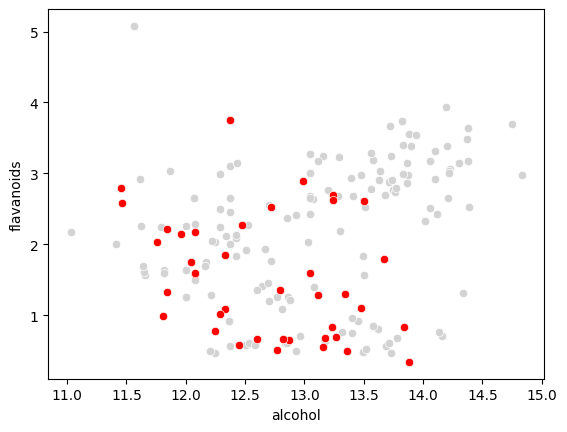

In [138]:
sns.scatterplot(X, x='alcohol', y='flavanoids', c='lightgray')
sns.scatterplot(X.loc[y != y_pred], x='alcohol', y='flavanoids', c='red')

###  Question 5: Ethics

Suppose you are designing an ML model that will target a new ad campaign to certain consumers. The ad campaign will offer a substantial discount on whatever your employer is selling. What concerns and thoughts would you have right up front about ensuring fairness from your ML model?


## Q5 - Answer
There are a lot of factors to consider here.  Whatever data your model is based on will incorporate some form of bias.  The model will have been trained on your available data which could give it some tendencies towards certain demographics.  This could give an unfair discount to certain groups and disadvantage other groups of the discount simply because they were targeted by the biases inherent in the data and thus the model.

There could also be injurious exposures towards certain groups, particularly if the product is some form of vice, like gambling, drugs etc.  One group would be receiving increased risk exposures as a result of being targeted with the discounts as a product of using the model.

One way to attempt to mitigate this would be to attempt to re-evaluate the model from a fairness perspective.  It also might be worth considering the removal of certain pieces of data to reduce the tendency of the data to target certain individuals.  It would be worth evaluating the performance against that information to ensure that the model is not optimizing itself towards any particular group, or away from any particular group in a manner that is unfair and could be harmful.  